In [47]:
import handcalcs.render
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
import numpy as np
from sympy import *
import math
from itertools import zip_longest
#https://www.whitman.edu/mathematics/calculus_online/section08.06.html
x_symbol = symbols("x")

Trapezoid Rule (for numerical approximation of integration) = 

$$\sum_{k=1}^{n}\frac{f(x_{k-1})+f(x_{k})}{2}\Delta x_{k}=(\frac{f(x_{0})}{2} + f(x_{1}) + f(x_{2}) + ... + f(x_{n - 1}) + \frac{f(x_{n})}{2})\Delta x$$

Newton's difference quotient (for numerical approximation of differentiation) = 

$$f'(x)=\lim_{h\rightarrow 0}\frac{f(x + h) - f(x)}{h}$$

Symmetric difference quotient (for numerical approximation of differentiation) = 

$$f'(x)=\lim_{h\rightarrow 0}\frac{f(x + h) - f(x - h)}{2h}$$

Fundemental theorem of calculus = $$\int _{a}^{b}\,f(x)dx=\left[F(x)\right]_{a}^{b}=F(b)-F(a)$$

In [188]:
def newton_numerical_derivative(f, x, h=0.0000001):
    """
    Calculates a numerical approximation of the gradient at x
    Using the Newton's difference quotient:
        m = (f(x + h) - f(x)) / h
    :param f: Function of the curve
    :param x: X position
    :param h: Extremely small number to add to x
    :return: Approximation of the gradient at the x coord
    """
    return (f.subs(x_symbol, x + h) - f.subs(x_symbol, x)) / h


def symmetric_numerical_derivative(f, x, h=0.0000001):
    """
    Calculates a numerical approximation of the gradient at x
    Using the Symmetric difference quotient:
        m = (f(x + h) - f(x - h)) / (2 * h)
    :param f: Function of the curve
    :param x: X position
    :param h: Extremely small number to add to x
    :return: Approximation of the gradient at the x coord
    """
    return (f.subs(x_symbol, x + h) - f.subs(x_symbol, x - h)) / (2 * h)


def symbolic_derivative(f):
    """
    Calculates the symbolic derivative of f(x)
    :param f: Function of the curve
    :return: f'(x)
    """
    return diff(f, x_symbol)


def derivative(f, x):
    """
    Calculates accurate gradient at x
    :param f: Function of the curve
    :param x: X position
    :return: Gradient at the x coord
    """
    return symbolic_derivative(f).subs(x_symbol, x)

In [217]:
def numerical_definite_integral(f, a, b, n=None):
    """
    Calculates a numerical approximation of the definite integral of f(x)
    
    This is done by using a simplification of the Trapezoid Rule:
        o Dividing the difference between a and b to get n equal strips
        o Getting the space between each strip (Δx)
        o Looping through the stips to get the y coord of each
        o Dividing the first and last by 2
        o Adding them all together
        o Multiplying it by Δx
        
    :param f: Function of the curve
    :param a: Start x postion
    :param b: End x postion
    :param n: Number of trapezoids
    :return: Area under the curve f(x) between a and b
    """
    f = lambdify(x_symbol, f, math)
    n = (abs(b - a) * 100000) if n is None else n
    Δx = (b - a)/n
    l = [f(a + (i * Δx)) for i in range(n)]
    l[0] = l[0]/2
    l[-1] = l[-1]/2
    return sum(l) * Δx


def indefinite_integral(f):
    """
    Calculates the indefinite integral
    :param f: Function of the curve
    :return: Indefinite integral of f(x)
    """
    return integrate(f, x_symbol)


def definite_integral(f, a, b):
    """
    Calculates the definite integral
    :param f: Function of the curve
    :param a: Start x position
    :param b: End x position
    :return: Area under the curve f(x) between a and b
    """
    F = indefinite_integral(f)
    return F.subs(x_symbol, b) - F.subs(x_symbol, a)

<IPython.core.display.Javascript object>


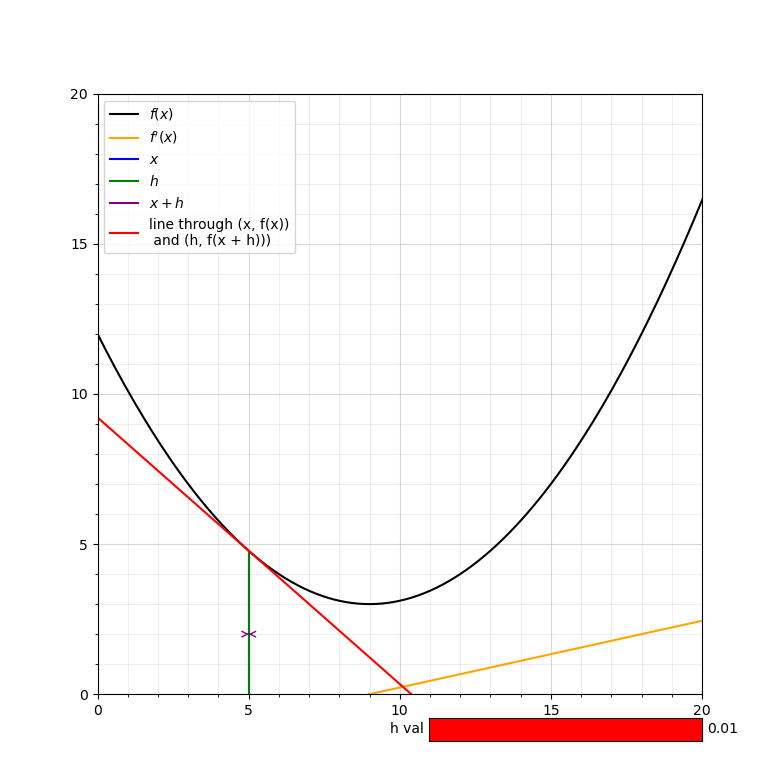

In [143]:
%matplotlib notebook

fig = plt.figure(figsize=(7.8, 7.8))
ax = plt.subplot(111)

plt.xlim(0, 20)
plt.ylim(0, 20)

x_axis = np.linspace(0, 100, 1000)


def gradient(x1, y1, x2, y2):
    return (y2 - y1) / (x2 - x1)


def y_intercept(x1, y1, m):
    return -(m * x1) + y1


def line_eq(m, c):
    return lambdify(symbols("x"), m*symbols("x") + c, math)


k = symbols("x")
expr = (k/3 - 3)**2 + 3
f = lambdify(k, expr, math)
f_prime = lambdify(k, diff(expr, k), math)
x = 5
h = 10

_, xlim = plt.xlim()
ax.plot(x_axis, f(x_axis), color="black", label=r"$f(x)$")
ax.plot(x_axis, f_prime(x_axis), color="orange", label=r"$f'(x)$")
x_line, = ax.plot([x, x], [f(x), 0], color="blue", label=r"$x$")
h_line, = ax.plot([x + h, x + h], [f(x + h), 0], color="green", label=r"$h$")
plt.plot([], [], color="purple", label=r"$x + h$")

tangent_line, = ax.plot(
    x_axis, line_eq(gradient(x, f(x), x + h, f(x + h)), y_intercept(x, f(x), gradient(x, f(x), x + h, f(x + h))))(x_axis),
    color="red", label="line through (x, f(x))\n and (h, f(x + h)))"
)


slider_ax = fig.add_axes([0.55, 0.05, 0.35, 0.03], facecolor="red")
slider = Slider(slider_ax, "h val", 0.01, x + h, valinit=x + h)

arrow = ax.annotate('', xy=(x + h,2), xytext=(x, 2),
            arrowprops={'arrowstyle': '<->', "color": "purple"})

legend = ax.legend(loc="upper left")

def sliders_on_change(val):
    h = val
    h_line.set_xdata([x + h, x + h])
    h_line.set_ydata([f(x + h), 0])
    tangent_line.set_xdata(x_axis)
    tangent_line.set_ydata(line_eq(gradient(x, f(x), x + h, f(x + h)), y_intercept(x, f(x), gradient(x, f(x), x + h, f(x + h))))(x_axis))
    arrow.xy = (x + h, 2)
    fig.canvas.draw_idle()

slider.on_changed(sliders_on_change) 

ax.set_xticks(np.arange(0, 21, 5))
ax.set_xticks(np.arange(0, 21, 1), minor=True)
ax.set_yticks(np.arange(0, 21, 5))
ax.set_yticks(np.arange(0, 21, 1), minor=True)

ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)

plt.show()

<IPython.core.display.Javascript object>


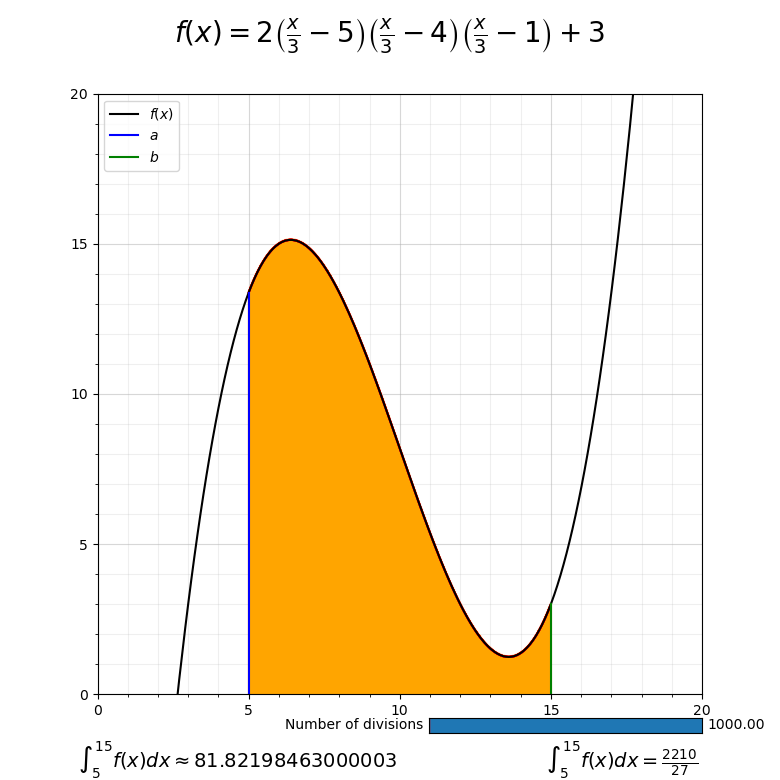

In [221]:
%matplotlib notebook

fig = plt.figure(figsize=(7.8, 7.8))
ax = plt.subplot(111)

plt.xlim(0, 20)
plt.ylim(0, 20)

x_axis = np.linspace(0, 100, 1000)

k = symbols("x")
expr = (k + 1)*(k - 2)*(k - 3)
expr = 2*expr.subs(k, k/3 - 2) + 3
f = lambdify(k, expr, math)
a = 5
b = 15
delta_x = b - a
max_delta_x = 1000

# Preload space for all possible lines
sub_lines = [ax.plot([], [], color="orange")[0] for i in range(max_delta_x)]
trap_lines = [ax.plot([], [], color="red")[0] for i in range(max_delta_x)]

_, xlim = plt.xlim()
ax.plot(x_axis, f(x_axis), color="black", label=r"$f(x)$")
a_line, = ax.plot([a, a], [f(a), 0], color="blue", label=r"$a$")
b_line, = ax.plot([b, b], [f(b), 0], color="green", label=r"$b$")

slider_ax = fig.add_axes([0.55, 0.06, 0.35, 0.02], facecolor="red")
slider = Slider(slider_ax, "Number of divisions", 2, max_delta_x, valinit=0, valstep=1)

integral_section = r"\int_{%s}^{%s}" % (str(a), str(b))

fig.suptitle(r"$f(x) = %s$" % expr._repr_latex_orig().replace("$", "")[14:], fontsize=20)
approx = plt.text(0.1, 0.015, r"$%s f(x) dx\approx $" % (integral_section), fontsize=14, transform=plt.gcf().transFigure)
definite = plt.text(0.7, 0.015, r"$%s f(x) dx= %s$" % (integral_section, definite_integral(expr, a, b)._repr_latex_orig().replace("$", "")[14:]), fontsize=14, transform=plt.gcf().transFigure)
# expr._repr_latex_orig().replace("$", "")[14:]

ax.legend(loc="upper left")

def sliders_on_change(val):
    approx.set_text(r"$%s f(x) dx\approx %s$" % (integral_section, str(numerical_definite_integral(expr, a, b, int(val)))))
    delta_x = (b - a) / val
    sub_lines_x = np.arange(a, b, delta_x)
    for i, p in zip_longest(sub_lines_x, range(max_delta_x), fillvalue=0):
        sub_lines[p].set_xdata([i, i])
        sub_lines[p].set_ydata([f(i), 0])
    
    trap_lines_x = np.concatenate((sub_lines_x, np.array([b])))
    
    for i in range(len(trap_lines_x) - 1):
        trap_lines[i].set_xdata([trap_lines_x[i], trap_lines_x[i + 1]])
        trap_lines[i].set_ydata([f(trap_lines_x[i]), f(trap_lines_x[i + 1])])
    
    for i in range(len(trap_lines_x) - 1, len(trap_lines)):
        trap_lines[i].set_xdata([0, 0])
        trap_lines[i].set_ydata([0, 0])

    fig.canvas.draw_idle()

slider.on_changed(sliders_on_change) 

ax.set_xticks(np.arange(0, 21, 5))
ax.set_xticks(np.arange(0, 21, 1), minor=True)
ax.set_yticks(np.arange(0, 21, 5))
ax.set_yticks(np.arange(0, 21, 1), minor=True)

ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)

plt.show()